In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor

## ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping

## Hyperparameter Tuning
from tensorflow import keras
from keras_tuner import RandomSearch
import keras_tuner as kt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Data

In [2]:
boston = datasets.load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<h3> Storing Data into dataframe </h3>

In [6]:
features = pd.DataFrame(boston.data,columns=boston.feature_names)
targets = boston.target

In [7]:
features.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
print(targets)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [9]:
print(features.shape)
print(targets.shape)

(506, 13)
(506,)


## Data Preprocessing

In [10]:
## Checking Missing Values
features.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [11]:
## Describing the data
features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


c:\users\ayush\anaconda3\envs\gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


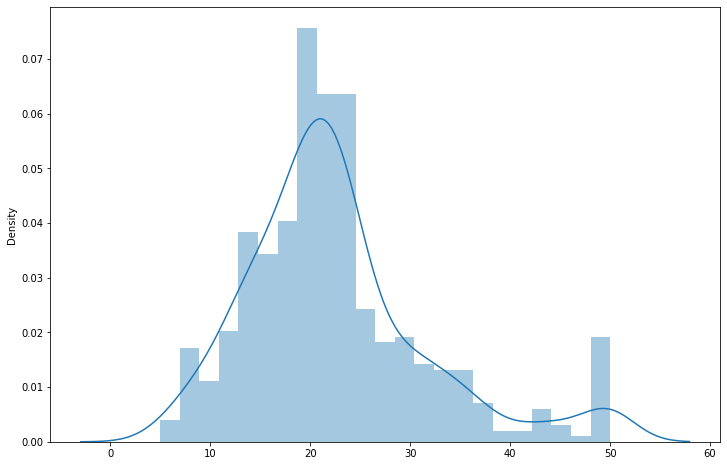

In [12]:
# Plotting Distribution plot for target variable and as we can see apart from few outliers, 
# the target variable is normally distributed.
plt.figure(figsize=(12,8))
sns.distplot(targets)
plt.show()

In [13]:
## Copying 
df_boston = features.copy()

In [14]:
# Merging features and target for finding correlation 
df_boston['MEDV'] = pd.Series(targets)

In [15]:
df_boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
## Correlation amongst dependent and Independent Variables
boston_corr = df_boston.corr()

In [17]:
## Correlation between Independent and Dependent Variables based on Magnitude in descending Variables
boston_corr['MEDV'].sort_values(key=abs, ascending=False)

MEDV       1.000000
LSTAT     -0.737663
RM         0.695360
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

As we can see here, DIS and CHAS have very low correlation with Target variable. We will now create a correlation Matrix and then we will remove those features who have low correlation with target variable and features having high multi-collinearity.

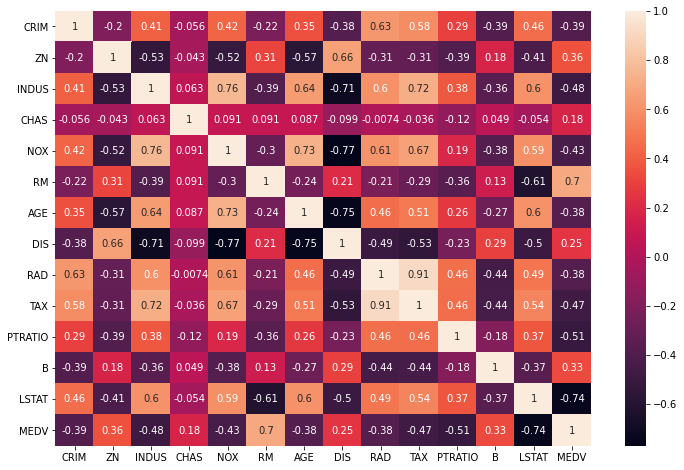

In [18]:
## Creating a Correlation Matrix.
plt.figure(figsize=(12,8))
sns.heatmap(data=boston_corr, annot=True)
plt.show()

<h3>Observation:</h3> <br> Features <b>DIS</b> and <b>CHAS</b> have low coorelation with target variable <b>MEDV</b><br> Here we also need to remove multi-colliniarity and that's why we need to remove any one of the features between <b>RAD</b> and <b>TAX</b> and <b>INDUS</b> and <b>NOX</b> respectively

In [19]:
## Dropping RAD, NOX, DIS and CHAS
df_boston.drop(['RAD','NOX'], axis=1, inplace=True)

In [20]:
df_boston

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,6.593,69.1,2.4786,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,6.120,76.7,2.2875,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,6.976,91.0,2.1675,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,6.794,89.3,2.3889,273.0,21.0,393.45,6.48,22.0


### Visualizing relationship between features and target variables

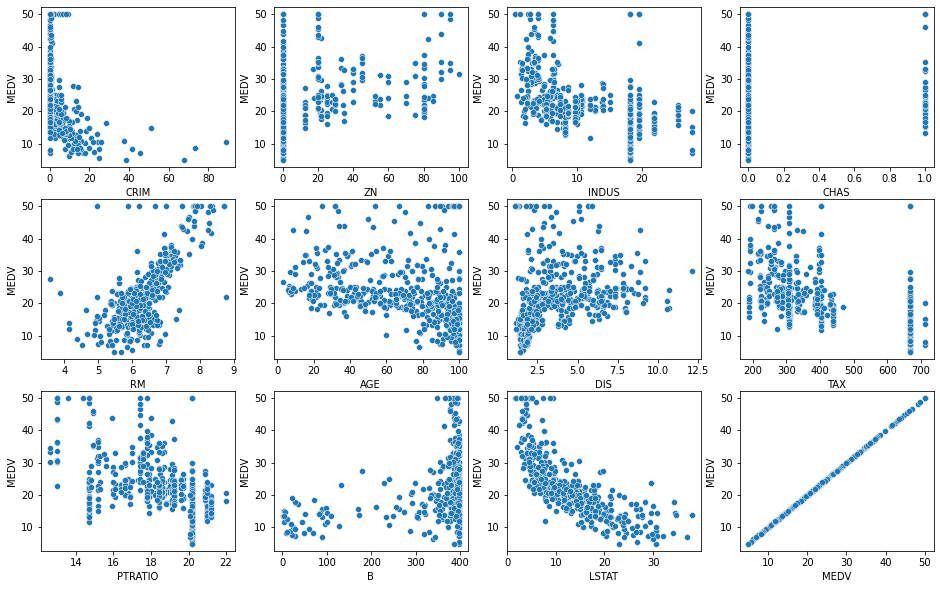

In [21]:
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(16,10))

for column, ax in zip(df_boston, axes.flat):
    sns.scatterplot(x=column, y='MEDV', data=df_boston, ax=ax)
plt.show()

<h2> Splitting Data into Train and Test </h2>

In [22]:
X = df_boston.drop('MEDV', axis=1)
y = df_boston['MEDV']

In [23]:
print("===============TRAIN DATA==============")
X

===============TRAIN DATA==============


,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,7.147,54.2,6.0622,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,6.593,69.1,2.4786,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,6.120,76.7,2.2875,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,6.976,91.0,2.1675,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,6.794,89.3,2.3889,273.0,21.0,393.45,6.48


In [24]:
print("===============TEST DATA==============")
y

===============TEST DATA==============


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

<h3> Scaling </h3>

In [26]:
scaler = MinMaxScaler()

In [27]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
print("==============Train and Test Data Split Shape==================")
print(X_train.shape)
print(X_test.shape)

==============Train and Test Data Split Shape==================
(354, 11)
(152, 11)


<h2> Creating Model Linear Regressor</h2>

In [29]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [30]:
## Model prediction on Trained Data
lm_predict = linear_model.predict(X_train)

<h3> Model Evaluation on Train Data </h3>

In [31]:
## Evauating MSE, R^2 and Adjusted R^2
print('MSE: ',metrics.mean_squared_error(y_train, lm_predict))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_train, lm_predict)))
print('R^2: ',metrics.r2_score(y_train, lm_predict))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, lm_predict))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

MSE:  25.563777804404683
RMSE:  5.056063469182788
R^2:  0.6851327410160732
Adjusted R^2: 0.6750054315165902


In [32]:
## Model prediction on Test Data
lm_predict_test = linear_model.predict(X_test)

In [33]:
print('MSE: ',metrics.mean_squared_error(y_test, lm_predict_test))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test, lm_predict_test)))
print('R^2: ',metrics.r2_score(y_test, lm_predict_test))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, lm_predict_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MSE:  20.359143820829793
RMSE:  4.512110794387677
R^2:  0.7778707353605404
Adjusted R^2: 0.7604177217102972


<h2> Random Forest Regressor </h2>

In [34]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

<h3> Model Evaluation </h3>

In [35]:
## Model prediction on Trained Data
rf_predict = rf_model.predict(X_train)

In [36]:
## Evauating MSE, R^2 and Adjusted R^2
print('MSE: ',metrics.mean_squared_error(y_train, rf_predict))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_train, rf_predict)))
print('R^2: ',metrics.r2_score(y_train, rf_predict))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, rf_predict))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

MSE:  1.8873025903954816
RMSE:  1.373791319813705
R^2:  0.9767542263096693
Adjusted R^2: 0.9760065552260622


In [37]:
## Model prediction on Test Data
rf_predict_test = rf_model.predict(X_test)

In [38]:
## Evauating MSE, R^2 and Adjusted R^2
print('MSE: ',metrics.mean_squared_error(y_test, rf_predict_test))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test, rf_predict_test)))
print('R^2: ',metrics.r2_score(y_test, rf_predict_test))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, rf_predict_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MSE:  9.2720563881579
RMSE:  3.045005154044554
R^2:  0.8988368526042873
Adjusted R^2: 0.8908883195946241


<h2> Creating Model Artificial Neural Network(ANN) </h2>

In [39]:
model_ann = Sequential()

model_ann.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model_ann.add(Dense(32,activation='relu'))
model_ann.add(Dense(16,activation='relu'))
model_ann.add(Dense(8,activation='relu'))
model_ann.add(Dense(1))

model_ann.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
            loss=keras.losses.MeanSquaredError())

In [40]:
earlystop = EarlyStopping(
  monitor='val_loss', min_delta=0.0001,
  patience=3)

In [41]:
model_ann.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=32,epochs=400, callbacks=[earlystop])

Epoch 1/400
12/12 [==============================] - 1s 15ms/step - loss: 580.7839 - val_loss: 616.9023
Epoch 2/400
12/12 [==============================] - 0s 3ms/step - loss: 574.8455 - val_loss: 610.4902
Epoch 3/400
12/12 [==============================] - 0s 3ms/step - loss: 566.5022 - val_loss: 599.1406
Epoch 4/400
12/12 [==============================] - 0s 3ms/step - loss: 551.6160 - val_loss: 577.3416
Epoch 5/400
12/12 [==============================] - 0s 3ms/step - loss: 521.9426 - val_loss: 535.9964
Epoch 6/400
12/12 [==============================] - 0s 3ms/step - loss: 469.3054 - val_loss: 463.9962
Epoch 7/400
12/12 [==============================] - 0s 3ms/step - loss: 383.0176 - val_loss: 354.2445
Epoch 8/400
12/12 [==============================] - 0s 3ms/step - loss: 262.2457 - val_loss: 222.6386
Epoch 9/400
12/12 [==============================] - 0s 3ms/step - loss: 152.4789 - val_loss: 131.0293
Epoch 10/400
12/12 [==============================] - 0s 3ms/step - loss

In [43]:
losses = pd.DataFrame(model_ann.history.history)

<AxesSubplot:>

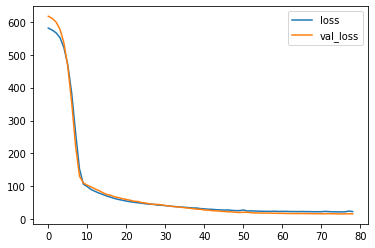

In [44]:
losses.plot()

In [45]:
## Predicting model on trained Data
model_ann_predict = model_ann.predict(X_train)

In [46]:
## Evauating MSE, R^2 and Adjusted R^2
print('MSE: ',metrics.mean_squared_error(y_train, model_ann_predict))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_train, model_ann_predict)))
print('R^2: ',metrics.r2_score(y_train, model_ann_predict))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, model_ann_predict))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

MSE:  22.949557256900604
RMSE:  4.790569617164603
R^2:  0.7173319122211305
Adjusted R^2: 0.70824024857912


In [47]:
## Predicting model on test Data
model_ann_predict_test = model_ann.predict(X_test)

In [48]:
## Evauating MSE, R^2 and Adjusted R^2
print('MSE: ',metrics.mean_squared_error(y_test, model_ann_predict_test))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test, model_ann_predict_test)))
print('R^2: ',metrics.r2_score(y_test, model_ann_predict_test))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, model_ann_predict_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MSE:  16.578421143892655
RMSE:  4.071660735362495
R^2:  0.8191204635133791
Adjusted R^2: 0.8049084999322874


<h3> Creating Artificial Neural Network(ANN) using Keras Tuner </h3><br>ref: https://www.tensorflow.org/tutorials/keras/keras_tuner

In [49]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(X_train.shape[1],)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=8, max_value=64, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.MeanSquaredError(),)

  return model

In [50]:
tuner = kt.Hyperband(model_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='boston_data')

In [51]:
stop_early = EarlyStopping(monitor='val_loss', patience=5)

In [52]:
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 6 Complete [00h 00m 00s]
val_loss: 517.3775634765625

Best val_loss So Far: 382.4035949707031
Total elapsed time: 00h 00m 03s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 40 and the optimal learning rate for the optimizer
is 0.01.



In [53]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[stop_early])

val_loss_per_epoch = history.history['val_loss']
best_epoch = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/100
9/9 [==============================] - 0s 14ms/step - loss: 583.2596 - val_loss: 484.4237
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 515.7520 - val_loss: 389.4009
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 383.7883 - val_loss: 243.9327
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 224.3088 - val_loss: 130.8875
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 127.6611 - val_loss: 124.7535
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 117.2262 - val_loss: 117.9948
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 101.3477 - val_loss: 91.1810
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 87.9794 - val_loss: 79.6706
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 80.5401 - val_loss: 73.1768
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 72.4580 - val_loss: 67.

9/9 [==============================] - 0s 4ms/step - loss: 20.8480 - val_loss: 20.7398
Epoch 83/100
9/9 [==============================] - 0s 4ms/step - loss: 20.9067 - val_loss: 20.5821
Epoch 84/100
9/9 [==============================] - 0s 4ms/step - loss: 20.6612 - val_loss: 20.4838
Epoch 85/100
9/9 [==============================] - 0s 4ms/step - loss: 20.6280 - val_loss: 20.4454
Epoch 86/100
9/9 [==============================] - 0s 4ms/step - loss: 20.5281 - val_loss: 20.4087
Epoch 87/100
9/9 [==============================] - 0s 3ms/step - loss: 20.4214 - val_loss: 20.3546
Epoch 88/100
9/9 [==============================] - 0s 4ms/step - loss: 20.5464 - val_loss: 20.3697
Epoch 89/100
9/9 [==============================] - 0s 3ms/step - loss: 20.5382 - val_loss: 20.1469
Epoch 90/100
9/9 [==============================] - 0s 3ms/step - loss: 20.9140 - val_loss: 20.3430
Epoch 91/100
9/9 [==============================] - 0s 4ms/step - loss: 20.3117 - val_loss: 20.1031
Epoch 92/100


In [54]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/99
9/9 [==============================] - 0s 14ms/step - loss: 567.9398 - val_loss: 459.9125
Epoch 2/99
9/9 [==============================] - 0s 4ms/step - loss: 480.1215 - val_loss: 343.1474
Epoch 3/99
9/9 [==============================] - 0s 4ms/step - loss: 328.2113 - val_loss: 194.6169
Epoch 4/99
9/9 [==============================] - 0s 3ms/step - loss: 179.0807 - val_loss: 116.7514
Epoch 5/99
9/9 [==============================] - 0s 4ms/step - loss: 122.8648 - val_loss: 129.5887
Epoch 6/99
9/9 [==============================] - 0s 4ms/step - loss: 113.8808 - val_loss: 107.7684
Epoch 7/99
9/9 [==============================] - 0s 4ms/step - loss: 94.6192 - val_loss: 85.1089
Epoch 8/99
9/9 [==============================] - 0s 4ms/step - loss: 85.6747 - val_loss: 75.4287
Epoch 9/99
9/9 [==============================] - 0s 4ms/step - loss: 76.8136 - val_loss: 69.5939
Epoch 10/99
9/9 [==============================] - 0s 4ms/step - loss: 68.9155 - val_loss: 64.2962
Epoch 

9/9 [==============================] - 0s 3ms/step - loss: 20.4864 - val_loss: 20.5506
Epoch 84/99
9/9 [==============================] - 0s 3ms/step - loss: 20.0808 - val_loss: 20.9529
Epoch 85/99
9/9 [==============================] - 0s 3ms/step - loss: 20.1569 - val_loss: 20.4379
Epoch 86/99
9/9 [==============================] - 0s 3ms/step - loss: 20.1505 - val_loss: 20.4998
Epoch 87/99
9/9 [==============================] - 0s 3ms/step - loss: 20.0411 - val_loss: 20.6378
Epoch 88/99
9/9 [==============================] - 0s 3ms/step - loss: 20.0640 - val_loss: 20.4801
Epoch 89/99
9/9 [==============================] - 0s 4ms/step - loss: 19.7945 - val_loss: 20.6580
Epoch 90/99
9/9 [==============================] - 0s 4ms/step - loss: 20.1462 - val_loss: 20.1756
Epoch 91/99
9/9 [==============================] - 0s 4ms/step - loss: 19.6697 - val_loss: 20.3709
Epoch 92/99
9/9 [==============================] - 0s 3ms/step - loss: 19.6223 - val_loss: 20.2780
Epoch 93/99
9/9 [=====

In [55]:
eval_result = hypermodel.evaluate(X_test, y_test)
print("[test loss]:", eval_result)

5/5 [==============================] - 0s 1ms/step - loss: 13.5521
[test loss]: 13.552133560180664
